In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [215]:
from sklearn.preprocessing import LabelEncoder

# read the dataset
df=pd.read_csv('german_credit_risk.csv')

# converting the categorical data into the numeric data
lb=LabelEncoder()
df.account_check_status=lb.fit_transform(df.account_check_status)
df.credit_history=lb.fit_transform(df.credit_history)
df.purpose=lb.fit_transform(df.purpose)
df.savings=lb.fit_transform(df.savings)
df.present_emp_since=lb.fit_transform(df.present_emp_since)
df.personal_status_sex=lb.fit_transform(df.personal_status_sex)
df.property=lb.fit_transform(df.property)
df.other_debtors=lb.fit_transform(df.other_debtors)
df.other_installment_plans=lb.fit_transform(df.other_installment_plans)
df.housing=lb.fit_transform(df.housing)
df.job=lb.fit_transform(df.job)
df.telephone=lb.fit_transform(df.telephone)
df.foreign_worker=lb.fit_transform(df.foreign_worker)

# defining feature matrix(X) and response vector(y) 
X=df.drop(['default','housing','job','property','foreign_worker', 'people_under_maintenance'],axis=1)
Y=df['default']

# split X and Y in the training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3, random_state=0)

# create logistic regression object 
model=LogisticRegression()

# train the model using the training sets
model.fit(Xtrain,ytrain)

# making predictions on the testing set 
y_model=model.predict(Xtest)

# comparing actual response values (y_test) with predicted response values (y_model) 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score
result_byLogistic=accuracy_score(ytest,y_model)*100
print("Logistic Regression model accuracy(in %):",result_byLogistic)
print('\n')
print("**confusion matrix**")
print(confusion_matrix(ytest,y_model))  
print('\n')
print("**classification**")
print(classification_report(ytest,y_model))
print("ROC accuracy(in %):",roc_auc_score(ytest,y_model)*100)


Logistic Regression model accuracy(in %): 79.33333333333333


**confusion matrix**
[[190  24]
 [ 38  48]]


**classification**
             precision    recall  f1-score   support

          0       0.83      0.89      0.86       214
          1       0.67      0.56      0.61        86

avg / total       0.79      0.79      0.79       300

ROC accuracy(in %): 72.29950010867202


In [193]:
#by using the SVC
from sklearn.svm import SVC
model=SVC()
model.fit(Xtrain,ytrain)
result_bySVC=accuracy_score(ytest,model.predict(Xtest))*100
print("accuracy score=",result_bySVC)

accuracy score= 71.33333333333334


In [210]:
from sklearn.ensemble import RandomForestClassifier

#Create a randomforest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(Xtrain,ytrain)

# making predictions on the testing set 
y_pred=clf.predict(Xtest)
from sklearn import metrics
# comparing actual response values (ytest) with predicted response values (y_pred)
result_byRandomforest=metrics.accuracy_score(ytest, y_pred)*100
print("Accuracy:",result_byRandomforest)

Accuracy: 80.33333333333333


****Correlation****


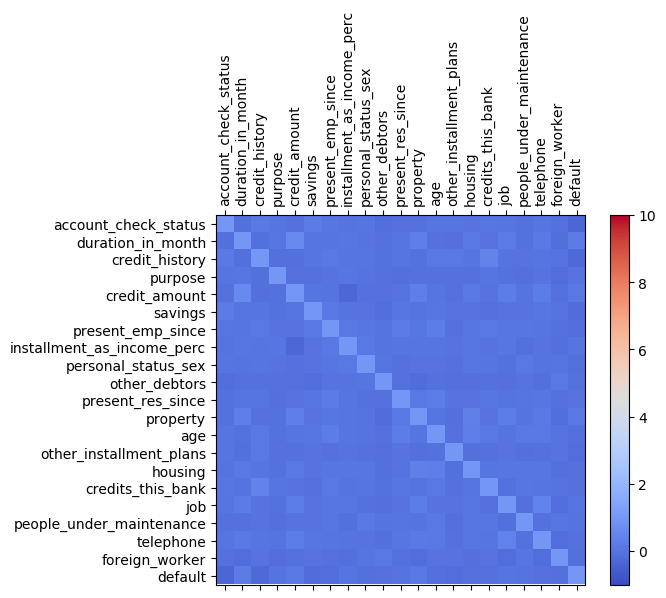

In [64]:
print("****Correlation****")
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=10)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

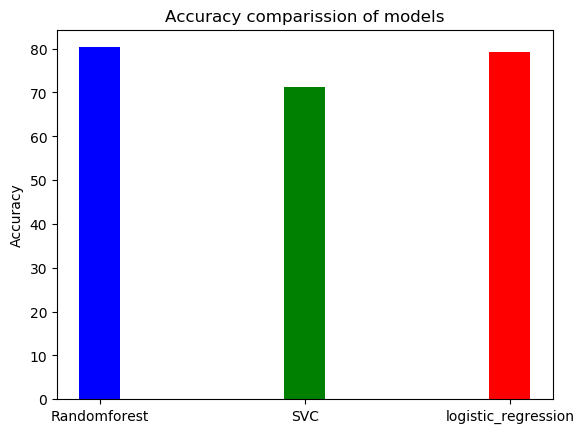

In [220]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Randomforest', 'SVC', 'logistic_regression')
y_pos = np.arange(len(objects))
performance = [result_byRandomforest,result_bySVC,result_byLogistic]
plt.bar(y_pos, performance, align='center',width=0.2,color=['b','g','r'])
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy comparission of models')
 
plt.show()